<a href="https://colab.research.google.com/github/coder-omer/Pandas/blob/main/_notebooks/2020-03-24-End-to-End%20Data%20Science%20Project%20with%20Adult%20Income%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Data Science Project with Adult Income Dataset
> From understand the problem, to deliver the solution. 

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning]



# Overview

Recently I got a freelance Data Science Job from a LinkedIn member. It's typical binary classification task with applicant basic information from an online commerical startup. The business onwer consult me about building a simpel Machine Learning model to provide an automated account opening checking system, and gave me a small dataset(around 60,000 instances). I would like to share some of my experiences of this Data Science project, of course I won't be able to share the excat dataset and it's detail , but I found out the U.S. Adult Income Dataset could be one candidate to share the similarity, so I pick it as a sharing sample.

## About U.S. Adult Income Dataset

**Abstract**: Based on every observation's attributes, predict whether a instance aka a person, income exceeds US$50,000 annually. Also known as "Census Income" dataset, it's originally donated by Ronny Kohavi and Barry Becker at 1996. It's _Classification_ Task, with categorical and numerical features, some of the instance have missing values, the missing value was denoted as `"?"`

Total have 14 columns of features, the last column: `income` is the classification label: `>50k, <=50k`, other features as below: 

* `age`: numerical
* `workclass`: categorical
* `fnlwgt`: numerical
* `education`: categorical
* `education-num`: numerical
* `marital-status`: categorical
* `occupation`: categorical
* `relationship`: categorical
* `race`: categorical
* `sex`: categorical
* `capital-gain`: numerical
* `capital-loss`: numerical
* `hours-per-week`: numerical
* `native-country`: categorical

And one more things need to take note is the dataset is imbalanced, there are two classes values: `>50k` and `<=50k`.
* `>50k`: miniority class, around `25%`
* `<=50k`: majority class, around `75%`

This dataset is openly accessable, either visit: [UCI(University of California, Irvine) Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult), or [Kaggle Adult Dataset](https://www.kaggle.com/wenruliu/adult-income-dataset). 

# Typical Data Science workflow

Before we get our hand dirty, let's understand our workflow so that we can follow the steps, normally when we receive a Data Science job, no matter is from which sector, it could be Financial, consumer, computer network, manufacturing, we need to have a proper understanding of the problem we are going to solve. An article from [Towardsdatascience](https://towardsdatascience.com/the-data-science-workflow-43859db0415) have a very good explaination: 

![](https://github.com/JL1829/johnny-ds-blog/blob/master/_notebooks/my_icons/datascienceworkflow.png?raw=true)

For most of the project, it will fall into the flows: 

* **Understand the Business Problem**:
    * In here, the problem is to predict whether a person's income is exceeded `US$50,000.00` based on the features, in commercial, it could be predict a person will place order on particular products based on his/her browsing behavior

* **EDA(Exploratory Data Analysis)**:
    * Not all the data science project dataset is perfectly clean like the professior gave you in academic, real word dataset that the customer gave you will be very "dirty", it contain lot's of outlier, missing value, or others intentionly wrong filling. We need to identify it and procss to next steps

* **Data Cleaning**:
    * Following previous step, once we have identified the outlier, missing values, we will "clean" it via statistical method or others method. 
    
* **Feature Engineering**: 
    * Well, this is one of the most time and brain power consuming steps, it mean we need to figure out each feature's corrlation between the label, selecting, or extracting the most relevent feature to feed into the model, it's very important step that help us to fight with the Curse of Dimensionality and the under-fit/over-fit problem. 

* **Baseline Model Result**:
    * Some of the Data Scientist will miss out this part, most of the time they will just simple feed the "cleaned" dataset into the model and get a simply `75%` accuracy, well, in Adult dataset, I can say I can throw any dummy classification model it will get `75%` accuracy, as it's imbalanced with `75%` majority class, in order to understand how well the model is working, we must have some baseline data, so this is the part we figure the baseline. 

* **Model Evaluate and Fine Turn**: 
    * How good is the model, can we improve more? here we fine turn the hyperparameter to make it closer to production level. 

* **Iteration**: 
    * Present the work to customer, put the model into production, get feedback, imporve. 


# Exploratory Data Analysis (EDA)

Let's get into Adult Dataset

Move to Dataset [Kaggle Site](https://www.kaggle.com/wenruliu/adult-income-dataset) to download it.
Or we can use scikit-learn `fetch_openml` to fetch it.

In [ ]:
# import
import numpy as np
import pandas as pd
from collections import Counter

# load dataset
adult_df = pd.read_csv('/storage/adult.csv', na_values='?')

# overview of the dataset
print(adult_df.info())
print("\n")
print(adult_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


   age  workclass  fnlwgt     education  educational-num      marital

In [ ]:
# check the missing value
print("Checking dataframe missing values:\n")
for column in adult_df.columns:
    if adult_df[column].isnull().sum() != 0:
        missingValue = adult_df[column].isnull().sum()
        percentage = missingValue / len(adult_df[column]) * 100
        dtype = adult_df[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {missingValue}, percentage: {percentage:.2f}%")

# memory cleaning
del missingValue
del percentage
del dtype

Checking dataframe missing values:

The column: 'workclass' with Data Type: 'object' has missing value: 2799, percentage: 5.73%
The column: 'occupation' with Data Type: 'object' has missing value: 2809, percentage: 5.75%
The column: 'native-country' with Data Type: 'object' has missing value: 857, percentage: 1.75%


Well, that not too much, about how to handle the missing value, is a balance game, either throw it away, if there's not too much impact to the model performance, or impute it with some strategy, such as `most-frquent` since they are all `categorical` value, or `mean`, `median` etc if they are `numerical` value. 
In this case, as the missing value fall into the `categorical` features, we will use the `pandas` DataFrame [mode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) method to fill the missing value 

In [ ]:
# check the label class and it's distribution percentage
label = adult_df.values[:, -1]
counter = Counter(label)
for key, value in counter.items():
    percentage = value / len(label) * 100
    print(f"Class: {key}, Count = {value}, Percentage = {percentage:.1f}%.")

Class: <=50K, Count = 37155, Percentage = 76.1%.
Class: >50K, Count = 11687, Percentage = 23.9%.


In [ ]:
numerical_subset = adult_df.select_dtypes(include=['int64', 'float64'])

In [ ]:
print(numerical_subset)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
488

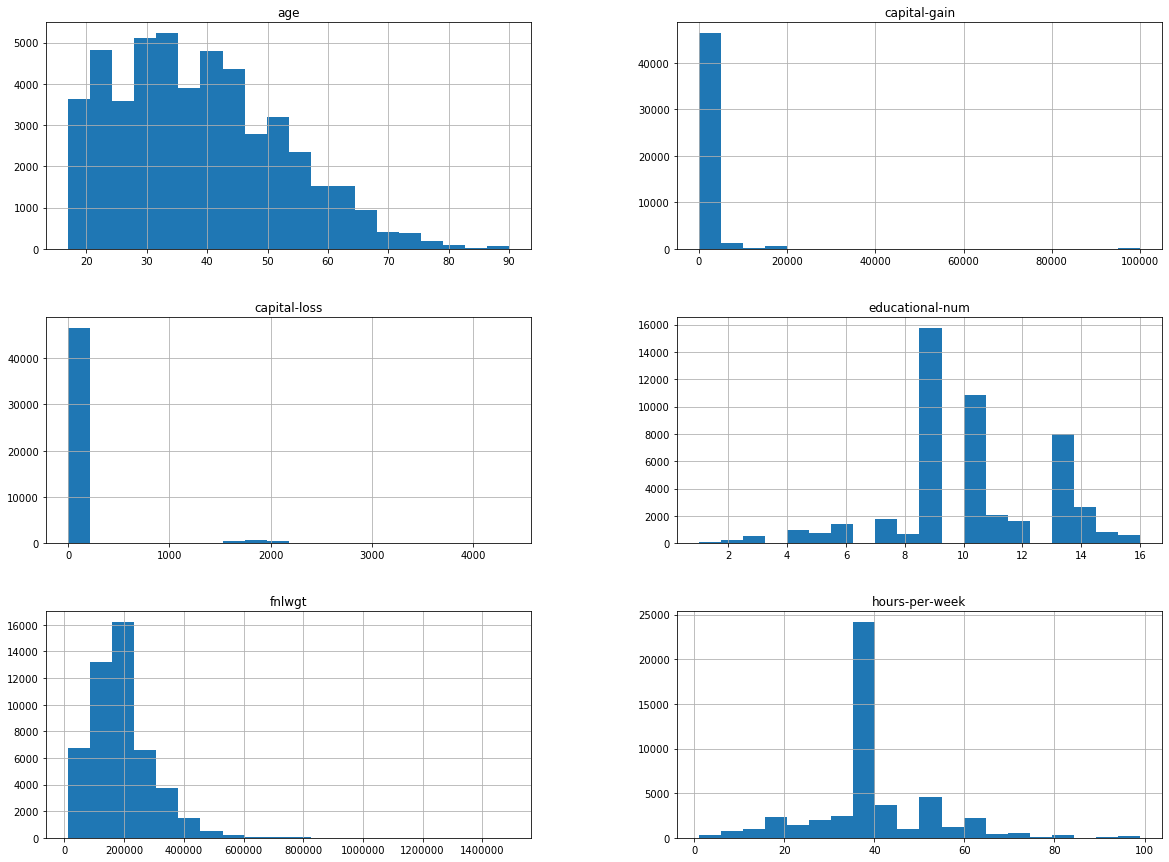

In [ ]:
import matplotlib.pyplot as plt
numerical_subset.hist(bins=20, figsize=(20, 15))
plt.show()

# Data Cleaning

After we have explored the overview of the dataset, we are going to dig out any anomaly in the dataset and clean it out. 

In [ ]:
# use DataFrame `mode()` method
adult_df = adult_df.fillna(adult_df.mode().iloc[0])
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


The `Non-Null Count` shows there's no more missing value from the dataset, it filled by the `most_frequent` value

In [ ]:
# checking the outliers
print(numerical_subset.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


Well, from the column `capital-gain`, the maximum value is `99999` which seems like little bit werid, we can check the dataset description, the `capital-gain` means the additional income from capital market, such as stocks, securities, `99999` indicated somebody wrongly imput or it repersented as `None` additional income, here we can try to replace it with the mean value, and we will replace the `99` hours in the `hours-per-week` column also

In [ ]:
# check the quantity of this outlier
print(f"There's {adult_df[adult_df['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {adult_df[adult_df['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 244 outlier in the capital-gain column
There's 137 outlier in the hours-per-week column


In [ ]:
# replace it with mean value
adult_df['capital-gain'].replace(99999, np.mean(adult_df['capital-gain'].values), inplace=True)
adult_df['hours-per-week'].replace(99, np.mean(adult_df['hours-per-week'].values), inplace=True)
print(adult_df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089    584.893278   
std       13.710510  1.056040e+05         2.570973   2530.549506   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  41310.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.258074  
std      403.004552       11.995662  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       98.000000  


After the data exploration and cleaning, we save the cleaned DataFrame to `adult_cleaned.csv` file

In [ ]:
adult_df.to_csv('/storage/adult_cleaned.csv', index=False)

# Baseline Model Result

We will evaluate candidate models using repeated stratified k-fold cross-validation 

The [k-fold cross-validation procedure](https://machinelearningmastery.com/k-fold-cross-validation/) provides a good general estimate of model performance that is not too optimistically biased, at least compared to a single train-test split. We will use `k=10`, meaning each fold will contain about `45,222/10`, or about `4,522 examples`.

`Stratified` means that each fold will contain the same mixture of examples by class, that is about `75%` to `25%` for the majority and minority classes respectively. Repeated means that the evaluation process will be performed multiple times to help avoid fluke results and better capture the variance of the chosen model. We will use three repeats.

This means a single model will be `fit` and evaluated `10 * 3` or `30` times and the mean and standard deviation of these runs will be reported.

This can be achieved using the [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) scikit-learn class. 

We will predict a class label for each example and measure model performance using classification accuracy.

The `evaluate_model()` function below will take the loaded dataset and a defined model and will evaluate it using repeated stratified k-fold cross-validation, then return a list of accuracy scores that can later be summarized.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    
    return X, y, cate_index, num_index

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return scores

In [ ]:
from sklearn.dummy import DummyClassifier

X, y, cate_index, num_index = load_dataset('storage/adult_cleaned.csv')
model = DummyClassifier(strategy='most_frequent')

In [ ]:
scores = evaluate_model(X, y, model)
print(scores)

[0.76069601 0.76069601 0.76085176 0.76085176 0.76085176 0.76064701
 0.76064701 0.76064701 0.76064701 0.76064701 0.76069601 0.76069601
 0.76085176 0.76085176 0.76085176 0.76064701 0.76064701 0.76064701
 0.76064701 0.76064701 0.76069601 0.76069601 0.76085176 0.76085176
 0.76085176 0.76064701 0.76064701 0.76064701 0.76064701 0.76064701]


In [ ]:
print(f"The Dummy Classifier mean accuracy: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {np.std(scores):.2f}")

The Dummy Classifier mean accuracy: 76.07%, with Standard Deviation: 0.00


In [ ]:
print(f"The type of dataset: {type(X)}.")
print(f"The shape of the dataset: Row: {X.shape[0]}, with {X.shape[1]} fetures")
print(f"The type of the target label: {type(y)}")
print(f"The shape of the target label is: {y.shape[0]} dimensional vector.")

The type of dataset: <class 'pandas.core.frame.DataFrame'>.
The shape of the dataset: Row: 48842, with 14 fetures
The type of the target label: <class 'numpy.ndarray'>
The shape of the target label is: 48842 dimensional vector.


Now that we have a test harness and a baseline in performance. In this case, we can see that the baseline algorithm achieves an accuracy of about `76.07%`. This score provides a lower limit on model skill; any model that achieves an average accuracy above about `76.07%` has skill, whereas models that achieve a score below this value do not have skill on this dataset. Now we can begin to evaluate some models on this dataset

# Model Evaluate and Fine Turn


## Evaluate Machine Learning Algorithms

Let’s start by evaluating a mixture of machine learning models on the dataset.

It can be a good idea to spot check a suite of different nonlinear algorithms on a dataset to quickly flush out what works well and deserves further attention, and what doesn’t.

We will evaluate the following machine learning models on the adult dataset:

* Decision Tree (CART)
* Support Vector Machine (SVM)
* Bagged Decision Trees (BAG)
* Random Forest (RF)
* Gradient Boosting Machine (GBM)

We will use mostly default model hyperparameters, with the exception of the number of trees in the ensemble algorithms, which we will set to a reasonable default of `100`.

We will define each model in turn and add them to a list so that we can evaluate them sequentially. The `generate_models()` function below defines the list of models for evaluation, as well as a list of model short names for plotting the results later.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    return X, y, cate_index, num_index

X, y, cate_index, num_index = load_dataset('/storage/adult_cleaned.csv')
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(48842, 14)
<class 'numpy.ndarray'>
(48842,)


In [ ]:
def generate_models():
    models, names = [], []
    names.append('CART')
    models.append(DecisionTreeClassifier())
    names.append('SVM')
    models.append(SVC(gamma='scale'))
    names.append('BAG')
    models.append(BaggingClassifier(n_estimators=100))
    names.append('RF')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('GBM')
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('Neural Network')
    models.append(MLPClassifier(early_stopping=True))
    return models, names

models, names = generate_models()

As now the X array still in pandas `DataFrame` with categorical values, here we need to "encoding" the categorical values into numerical values, [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) with Scikit-Learn [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) are quite handy

In [ ]:
steps = [('Categorical', OneHotEncoder(handle_unknown='ignore'), cate_index), ('Numerical', MinMaxScaler(), num_index)]

from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(steps, verbose=True)
X = transformer.fit_transform(X)

print(type(X))
print(X.shape)

[ColumnTransformer] ... (1 of 2) Processing Categorical, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing Numerical, total=   0.0s
<class 'scipy.sparse.csr.csr_matrix'>
(48842, 105)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34189, 105)
(14653, 105)
(34189,)
(14653,)


In [ ]:
# filter unwanted warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# evaluate each model in default parameters
for i in range(len(models)):
    print(f"""
    ********************************
     Now evaluating {names[i]} model
    ********************************\n""")
    
    scores = evaluate_model(X_train, y_train, models[i])
    print(f"The {names[i]} model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")


    ********************************
     Now evaluating CART model
    ********************************

The CART model average accuracy is: 81.20%, with Standard Deviation: 0.70.

    ********************************
     Now evaluating SVM model
    ********************************

The SVM model average accuracy is: 84.61%, with Standard Deviation: 0.61.

    ********************************
     Now evaluating BAG model
    ********************************

The BAG model average accuracy is: 85.24%, with Standard Deviation: 0.54.

    ********************************
     Now evaluating RF model
    ********************************

The RF model average accuracy is: 84.99%, with Standard Deviation: 0.58.

    ********************************
     Now evaluating GBM model
    ********************************

The GBM model average accuracy is: 86.31%, with Standard Deviation: 0.47.

    ********************************
     Now evaluating Neural Network model
    *****************

In this case, we can see that all of the chosen algorithms are skillful, achieving a classification accuracy above `76.07%`. We can see that the ensemble decision tree algorithms perform the best with perhaps stochastic gradient boosting performing the best with a classification accuracy of about `86.3%`.

This accuracy is using the default Hyperperameter, we can pick two top performance algorithms to use scikit-learn `GridSearch()` to fine turn the Hyperperameter to see whether it can get better performance. 

The best two performance algorithms: 

* BaggingClassfier(n_estimators=100)
* GradientBoostingClassfier(n_estimators=100)

We can try to fine turn this two model.

In [ ]:
# fine turn BaggingClassifier

from sklearn.model_selection import GridSearchCV

BAGgrid = {'n_estimators': [100, 200]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
BAGclf = BaggingClassifier()
BAGgrid_search = GridSearchCV(estimator=BAGclf, param_grid=BAGgrid, n_jobs=-1, cv=cv, 
                              scoring='accuracy', error_score=0)
BAGgrid_result = BAGgrid_search.fit(X_train, y_train)

In [ ]:
print(BAGgrid_result.best_score_)
print(BAGgrid_result.best_params_)

0.8518822471349845
{'n_estimators': 200}


In [ ]:
# fine turn GradientBoostingClassifier

GBMgrid = {'n_estimators': [100, 200]}
GBMclf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                    max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)
GBMgrid_search = GridSearchCV(estimator=GBMclf, param_grid=GBMgrid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
GBMgrid_result = GBMgrid_search.fit(X_train, y_train)

In [ ]:
print(GBMgrid_result.best_score_)
print(GBMgrid_result.best_params_)

0.8669747643525415
{'n_estimators': 200}


Well, seems like if the `n_estimators` is equal to 200, the GradientBoostingClassifier performance incrase to `86.69%`, then we can update our hyperparameter for GradientBoostingClassfier and train it according to our Training Subset, now we have the winner, is GradientBoostingClassifier algorithm. 

Actually using `GridSearchCV` is quite computational expensive, I would suggest to use Cloud Notebook Envirnoment, such Google Colab, AWS, or Google Cloud or Gradient, or Kaggle, both of them provide quite power CPU and tons of memory, and most important, they provide free GPU in certain amount of time

# Final: Train the best model, save it, and deliver to customer. 
We pick GradientBoostingClassifier as our final model, we will train it with Training Subset, and see how it goes in Testing Subset, then finally we will save it and deliver to our customer. 

In [ ]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                   max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# evaluate the testing subset
TestScore = model.score(X_test, y_test)
print(f"The model test set accuracy is: {(TestScore*100):.1f}%.")

The model test set accuracy is: 87.4%.


In [ ]:
# perform the Classification Report
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11147
           1       0.79      0.65      0.71      3506

    accuracy                           0.87     14653
   macro avg       0.84      0.80      0.82     14653
weighted avg       0.87      0.87      0.87     14653



In [ ]:
# to save the model
import joblib
joblib.dump(model, 'storage/final_model.sav')

['storage/final_model.sav']

# Further Reading

## Paper

* [Scaling Up The Accuracy of Naive-bayes Classifiers: A Decision-tree Hybrid](https://dl.acm.org/citation.cfm?id=3001502), 1996

## APIs

* [pandas.DataFrame.select_dtypes API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)
* [sklearn.model_selection.RepeatedStratifiedKFold API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html)
* [sklearn.dummy.DummyClassifier API](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
* [pandas.DataFrame.mode() API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)
